# 4 Calibration
This script mannually adjusts some model parameters so that simulated deaths better match observed deaths. In general, reported deaths is considered a more reliable metric than reported cases. This is because a lot of cases are not diagnosed, especially early on in an epidemic. Therefore, let's see if we can get the simulated death curve using the GREASYPOP population to match observed deaths a bit better by manually adjusting some parameters. See [Covasim Tutorial 7 - Calibration](https://docs.idmod.org/projects/covasim/en/latest/tutorials/tut_calibration.html) for more information on ways to calibrate the model.

**Input files**
- `greasypop.sim`
- `people_all.csv`
- `greasypop.ppl`
- `observed.csv`

**Output files**
- `greasypop_manual_calibration.sim`

In [1]:
# Import packages and set path
import covasim as cv
#cv.options(jupyter=True, verbose=0) # if you don't want to print cv output
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sciris as sc
import os
from scipy.io import mmread

path = "/Users/hamilaj1/Desktop/Covasim-G/data"

Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


Take a look at the `greasypop.sim` results from the last tutorial `3_compare_sims.ipynb`.

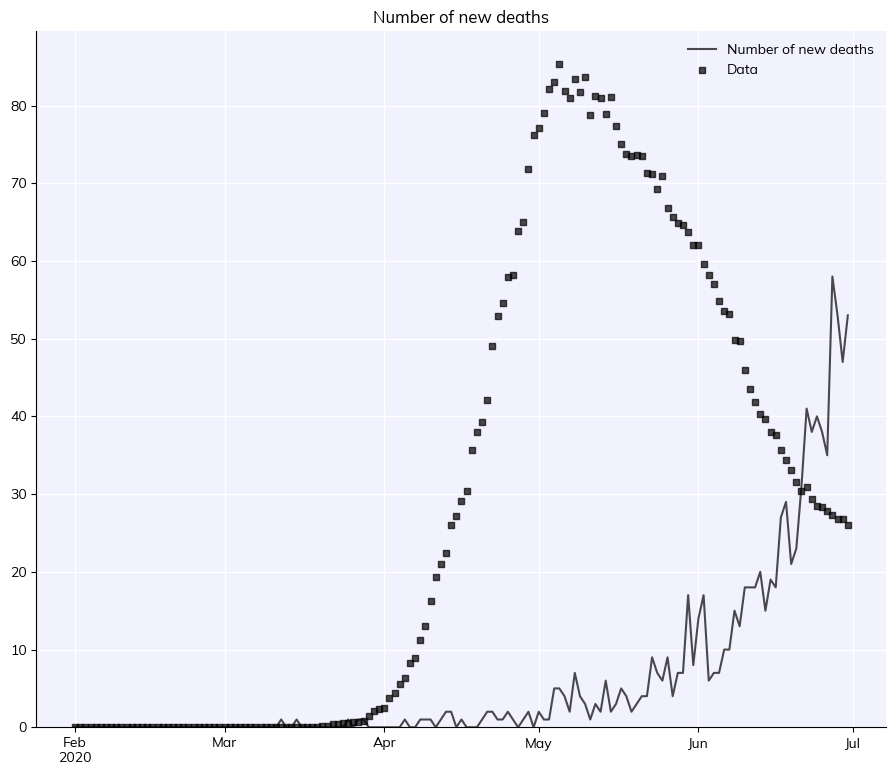

Figure(1000x800)


In [2]:
sim1 = cv.load(f'{path}/greasypop.sim') # Load sim
print(sim1.plot(to_plot=['new_deaths'])) # Plot new_infections and new_deaths

## 4.1 Manually adjust parameters
Now run a new sim with adjusted parameters to see if you can get the death curves to match a bit better. In general, curve matching is not a recommended calibration method, but it's a starting point. [Covasim Tutorial 7 - Calibration](https://docs.idmod.org/projects/covasim/en/latest/tutorials/tut_calibration.html) goes into more detail on quantitative calibration techniques. For a list of parameters and how to change them, see the [Covasim documentation](https://docs.idmod.org/projects/covasim/en/latest/parameters.html) on parameters. Once you've decided on a set of parameter values, save the sim.

In [3]:
people = pd.read_csv(f'{path}/people_all.csv', low_memory=False) # Read in people_all.csv so we have its length

Initializing sim with 9424031 people for 150 days
Loading population from /Users/hamilaj1/Desktop/Covasim-G/data/greasypop.ppl
  Running 2020-02-01 ( 0/150) (0.00 s)  ———————————————————— 1%
  Running 2020-02-11 (10/150) (20.19 s)  •——————————————————— 7%
  Running 2020-02-21 (20/150) (43.01 s)  ••—————————————————— 14%
  Running 2020-03-02 (30/150) (66.38 s)  ••••———————————————— 21%
  Running 2020-03-12 (40/150) (90.55 s)  •••••——————————————— 27%
  Running 2020-03-22 (50/150) (118.19 s)  ••••••—————————————— 34%
  Running 2020-04-01 (60/150) (151.71 s)  ••••••••———————————— 40%
  Running 2020-04-11 (70/150) (195.28 s)  •••••••••——————————— 47%
  Running 2020-04-21 (80/150) (250.60 s)  ••••••••••—————————— 54%
  Running 2020-05-01 (90/150) (309.37 s)  ••••••••••••———————— 60%
  Running 2020-05-11 (100/150) (363.59 s)  •••••••••••••——————— 67%
  Running 2020-05-21 (110/150) (410.99 s)  ••••••••••••••—————— 74%
  Running 2020-05-31 (120/150) (452.33 s)  ••••••••••••••••———— 80%
  Runni

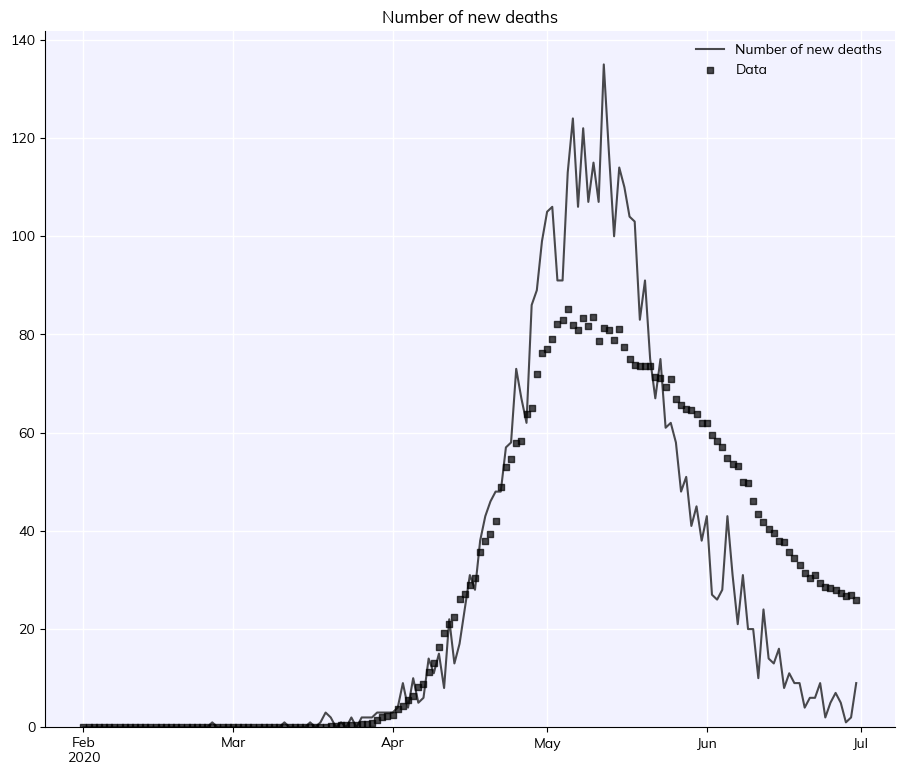

Figure(1000x800)


'/Users/hamilaj1/Desktop/Covasim-G/data/greasypop_manual_calibration.sim'

In [5]:
pars2 = dict( # Test out different parameter values
    pop_size = len(people), 
    pop_infected = 300, 
    start_day = '2020-02-01',
    end_day   = '2020-06-30',
    rel_death_prob = 0.1, # Death rate - was 1
    beta = 0.032,) # This was 0.016 for WA and OR. Let's increase it
sim2 = cv.Sim(pars2, popfile=f'{path}/greasypop.ppl', datafile=f'{path}/observed.csv').initialize() # Initialize sim
sim2.run() # Run sim
print(sim2.plot(to_plot=['new_deaths'])) # Plot daily deaths
sim2.save(f'{path}/greasypop_manual_calibration.sim') # Save sim

## 4.2 Covasim fit tool
Covasim also has built in tools for analyzing the fit of the sim to observed data. To learn more, visit [Covasim Tutorial 7 - Calibration](https://docs.idmod.org/projects/covasim/en/latest/tutorials/tut_calibration.html). In this example, we are able to decrease the mismatch value for cumulative deaths by ~400. Our sim does not have any testing interventions, which is why there are no simulated diagnoses.

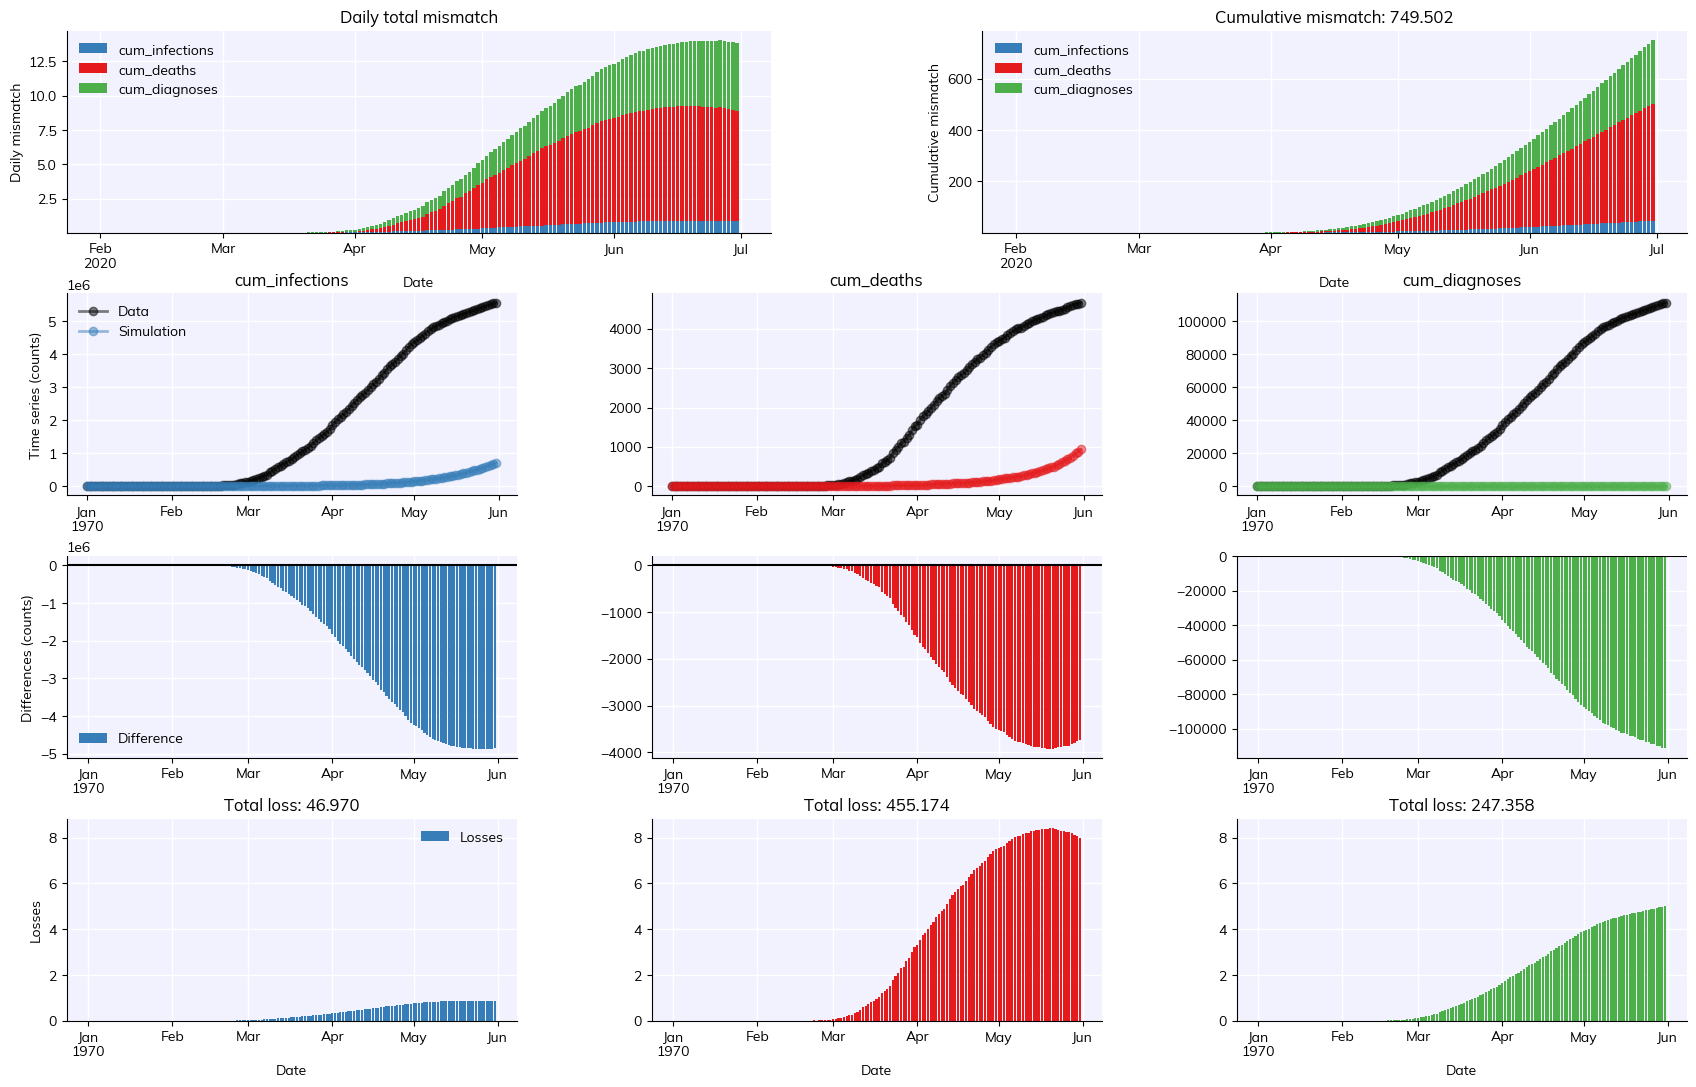

Mismatch values for:
#0. 'cum_infections': 46.9700616513959
#1. 'cum_deaths':     455.1735218508997
#2. 'cum_diagnoses':  247.35845754848205

Total mismatch value:
749.5020410507776


In [6]:
fit1 = sim1.compute_fit()
fit1.plot()
fit1.summarize()

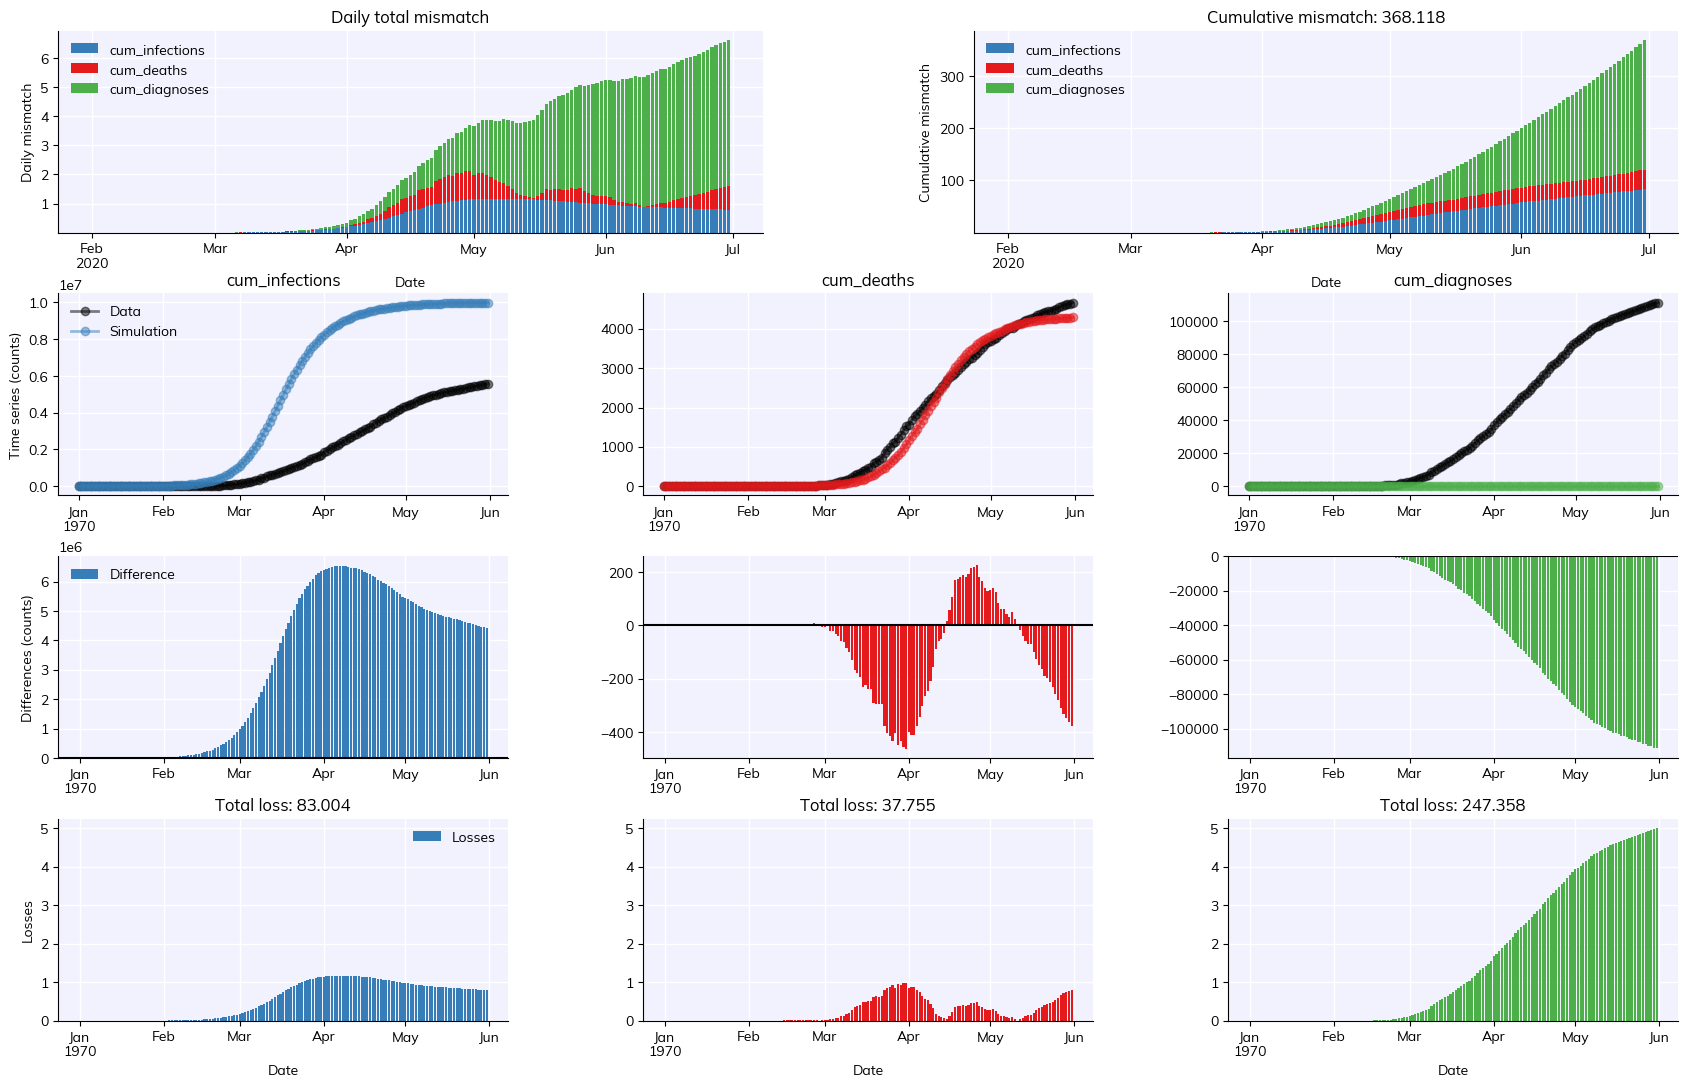

Mismatch values for:
#0. 'cum_infections': 83.00426121525939
#1. 'cum_deaths':     37.75492716366753
#2. 'cum_diagnoses':  247.35845754848205

Total mismatch value:
368.11764592740894


In [7]:
fit2 = sim2.compute_fit()
fit2.plot()
fit2.summarize()